 # __[Dimension Reduction](https://medium.com/accel-ai/machine-learning-algorithms-cheat-sheet-990104aaaabc)__ V1 - Jean-Pierre Morard
1- PCA ScikitLearn __[PCA](./AnalyseComposantesPrincipales-AgroParisTech.pdf)__ <br>
2- Autoencoder PYTORCH Ligthning<br>
3- Autoencoder KERAS Tensorflow <br>
4- Prédictions <br>
5- Visualisation Seaborn <br>
7- __[SVD](https://www.youtube.com/watch?v=gXbThCXjZFM)__ __[Reza Bagheri Lab](https://github.com/reza-bagheri/SVD_article/blob/master/SVD-note-book.ipynb)__ <br>

[<img src="doc/Dim-Reduc-Alternatives.png" title="towardsdatascience.com" width="250"/>](https://towardsdatascience.com/dimensionality-reduction-cheatsheet-15060fee3aa)
[<img src="doc/Fraction-of-Papers-Using-PyTorch-vs.-TensorFlow.png" title="www.assemblyai.com" width="350"/>](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/)<br>

#### Run this notebook
[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ivuxBVRJ9i7SsFnoRqsNbbRlbSjF57ja#scrollTo=1dv18pvqOGvl) or  [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/morard/abyx/lob/HEAD?labpath=main%2Fml1%2Fdim-reduc.ipynb)
 or __[Download Winpython64-3.10.4.0.exe](http://l.sourceforge.net/f/a/39FiVm9LfkUWRzvQpamCdw~~/AABcDgA~/RgRkWPe2P0R9aHR0cHM6Ly9zb3VyY2Vmb3JnZS5uZXQvcHJvamVjdHMvd2lucHl0aG9uL2ZpbGVzL2xhdGVzdC9kb3dubG9hZD91dG1fY2FtcGFpZ249dXBkYXRlciZ1dG1fbWVkaXVtPWVtYWlsJnV0bV9zb3VyY2U9c3Vic2NyaWJlcnNXA3NwY0IKYnE2xHdiT7g-xlIcamVhbi5waWVycmUubW9yYXJkQGdtYWlsLmNvbVgEAAAAAQ~~)__ __[+ requirement](requirement.txt)__<br>

## 1 - PCA with Sci-Kit-Learn

![alt text](doc/pca.png "PCA") 
<br> __[Source: Shervine Amidi - Stanford- Machine Learning cs-229](https://stanford.edu/~shervine/teaching/cs-229/)__ <br>

A                             B                            C1   C2  \
          x         y         z         x         y         z       AxB  A_B   
0 -0.171998 -0.241529  0.342450 -0.410480  0.970481  0.986115  0.173897  0.0   
1  0.176878  0.102840 -0.308264 -0.935547  0.691059 -0.893908  0.181151  0.0   
2  0.035491 -0.489339  0.476404 -0.722390 -0.957570 -0.194719  0.350173  0.0   

     D        AC                  BC            
    id         r         s         r         s  
0  1.0  0.388781 -0.196686  0.330790 -0.079936  
1  1.0 -0.382754  0.061372  0.431946  1.456294  
2  2.0  0.406540 -0.503506 -0.938755  0.444123

<AxesSubplot:>

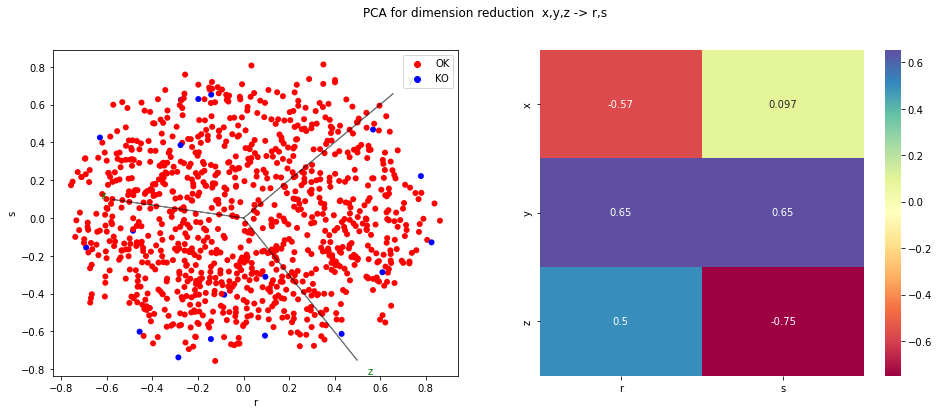

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from seaborn import scatterplot as plot
from seaborn import boxplot as boxplot
from seaborn import heatmap as heatplot
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.decomposition import PCA
from os import path
from shutil import rmtree

def mkdf(k):
    global pca
    ar = np.zeros((k, 13), float)
    ar[:, :3], ar[:, 3:6] = .5 * np.cos(2 * np.pi * np.random.rand(k, 3)), np.cos(2 * np.pi * np.random.rand(k, 3))
    ar[:, 6] = np.einsum('ij,ij->i', ar[:, :3], ar[:, 3:6])
    ar[:, 7] = (np.abs(np.trunc(ar[:, 6]))).astype(int)
    ar[:, 8] = np.random.randint(0, 3, k)
    ar[:, 9:11], ar[:, 11:13] = pca.fit_transform(ar[:, :3]), pca.fit_transform(ar[:, 3:6])
    df1, df2  = pd.DataFrame(ar[:, :3], columns=['x', 'y', 'z']), pd.DataFrame(ar[:, 3:6], columns=['x', 'y', 'z'])
    df3 = pd.DataFrame(ar[:, 6], columns=['AxB'])
    df4 = pd.DataFrame(ar[:, 7], columns=['A_B'])
    df5 = pd.DataFrame(ar[:, 8], columns=['id'])
    df6, df7 = pd.DataFrame(ar[:, 9:11], columns=['r', 's']), pd.DataFrame(ar[:, 11:13], columns=['r', 's'])
    return pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=1, keys=['A', 'B', 'C1', 'C2', 'D', 'AC', 'BC'])

nv, npc, n, p = 3, 2, 10, 100
pca = PCA(n_components=npc)

df = pd.concat([mkdf(p) for i in np.arange(n)])
df.index = np.arange(n * p)
display (df.head(3))

log = 'lightning_logs'
if path.isdir(log):
    rmtree(log)

data = 'ABC.csv'
#df.columns = df.columns.to_flat_index()
df.to_csv(data, index=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
txt = ','.join(df.A.columns.values) + ' -> ' + ','.join(df.AC.columns.values)
fig.suptitle(f'PCA for dimension reduction  {txt}')
C2_txt =  [['OK','KO'][int(v)] for v in df.C2.A_B.values]
plot(x=df.AC.r, y=df.AC.s, hue=C2_txt, palette=['red', 'blue'], ec=None, ax=ax1)

df.C2.A_B.describe()

for i in range(nv):
    ax1.arrow(0, 0,  pca.components_[0, i], pca.components_[1, i], alpha = 0.5)
    ax1.text(pca.components_[0,i]*1.1, pca.components_[1,i]*1.1, df.A.columns[i], color='g')

loadings_df = pd.DataFrame(dict(zip(df.AC.columns, pca.components_)),index= df.A.columns.values)
heatplot(loadings_df, annot=True, cmap='Spectral', ax=ax2)

In [2]:
y = df.C2.A_B
X = df.A
#X = pd.merge(df.A, df.C1.AxB, right_index = True, left_index = True)

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.2, random_state=42)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X) 

# Check if data are normalized

X.describe()

,x,y,z
count,1000.000000,1000.000000,1000.000000
mean,-0.006394,0.011196,-0.013662
std,0.351917,0.351531,0.357910
min,-0.499999,-0.499999,-0.500000
25%,-0.363318,-0.341630,-0.376034
50%,0.004721,0.034073,-0.026980
75%,0.342858,0.365595,0.360588
max,0.500000,0.500000,0.499996


## 2 - AUTOENCODER with Pytorch Lightning

![alt text](doc/nn.png "Title")
<br> __[Source: Shervine Amidi - Stanford- Machine Learning cs-229](https://stanford.edu/~shervine/teaching/cs-229/)__

In [3]:
import matplotlib.pyplot as plt
import tensorboard
from torch import Tensor, optim, stack, nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelSummary
from typing import Optional


class DataModule(pl.LightningDataModule):

    name = "A.B"

    def __init__(
        self,
        val_split: int = 200,
        num_workers: int = 0,
        normalize: bool = False,
        seed: int = 42,
        batch_size: int = 10,
        *args, **kwargs,
    ):

        super().__init__(*args, **kwargs)

        self.val_split = val_split
        self.num_workers = num_workers
        self.normalize = normalize
        self.seed = seed
        self.batch_size = batch_size
        self.dataset_train, self.dataset_val = [], []

    def setup(self, stage: Optional[str] = None):
        #self.dataset = pd.read_csv(data, skiprows=1)[['x','y','z']]
        #self.dataset = Tensor(self.dataset.values)
        #self.dataset_train, self.dataset_val = random_split(self.dataset, [self.dataset.shape[0] - self.val_split, self.val_split])
        self.dataset_train = Tensor(X_train)
        self.dataset_val = Tensor(X_test)

    def train_dataloader(self):
        loader = DataLoader(
            self.dataset_train,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=self.num_workers,
            drop_last=True,
            pin_memory=True,
        )
        return loader

    def val_dataloader(self):
        loader = DataLoader(
            self.dataset_val,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers,
            drop_last=True,
            pin_memory=True,
        )
        return loader

    @property
    def default_transforms(self):
        return None


class LitAutoEncoder(pl.LightningModule):

    def __init__(self,nc):
        super().__init__()
        cn = round(round(nc ** .5))
        self.encoder = nn.Sequential(
            nn.Linear(nc, cn),
            nn.ELU(),
            nn.Linear(cn, 2))

        self.decoder = nn.Sequential(
            nn.Linear(2, cn),
            nn.ELU(),
            nn.Linear(cn, nc),
            nn.Sigmoid())

    def forward(self, x):
        embedding = self.encoder(x)
        return embedding

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=1e-3)

    def training_step(self, train_batch, batch_idx):
        x = train_batch
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = F.mse_loss(x_hat, x)
        self.log('train_loss', loss)

        return loss

    def validation_step(self, val_batch, batch_idx):
        x = val_batch
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = F.mse_loss(x_hat, x)
        self.log('val_loss', loss)

    def training_epoch_end(self, outputs):
        avg_loss = stack([x['loss'] for x in outputs]).mean()
        self.log('avg_train', avg_loss)
        

pl.seed_everything(42, workers=True)
aet = LitAutoEncoder(X.shape[1])
data_loader = DataModule(num_workers=12)
trainer = pl.Trainer(deterministic=True, max_epochs=30, callbacks=[ModelSummary(max_depth=2)])
trainer.fit(aet, data_loader)

Global seed set to 42
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: A:\WPy64-31040\notebooks\Abyx\ml1\lightning_logs

  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | Sequential | 14    
1 | encoder.0 | Linear     | 8     
2 | encoder.1 | ELU        | 0     
3 | encoder.2 | Linear     | 6     
4 | decoder   | Sequential | 15    
5 | decoder.0 | Linear     | 6     
6 | decoder.1 | ELU        | 0     
7 | decoder.2 | Linear     | 9     
8 | decoder.3 | Sigmoid    | 0     
-----------------------------------------
29        Trainable params
0         Non-trainable params
29        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [4]:
%load_ext tensorboard
tensorboard.__version__

'2.8.0'

In [5]:
%tensorboard --logdir $log --port 6013 --host localhost

## 3 - AUTOENCODER with Keras

In [6]:
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, TensorBoard

logdir = path.join(log, datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

aek = Sequential()
es = EarlyStopping('val_loss', min_delta=1e-10, patience=100,
                       verbose=1, restore_best_weights=True)
ndim = X.shape[1]
ndim_inter = round(round(ndim**.5))
ndim_middle = 2

aek.add(Dense(ndim_inter, input_dim=ndim, activation='elu'))
aek.add(Dense(ndim_middle,activation='elu'))
aek.add(Dense(ndim_inter,activation='elu'))
aek.add(Dense(ndim, activation='sigmoid'))
aek.compile(optimizer='nadam', loss='mse')
history = aek.fit(X_train, X_train, batch_size=10,
              epochs=30, verbose=1, callbacks=[es, tensorboard_callback], validation_split=0.2)

aek.summary()

Epoch 1/30
64/64 [==============================] - 1s 4ms/step - loss: 0.3545 - val_loss: 0.3401
Epoch 2/30
64/64 [==============================] - 0s 2ms/step - loss: 0.3126 - val_loss: 0.2977
Epoch 3/30
64/64 [==============================] - 0s 2ms/step - loss: 0.2712 - val_loss: 0.2564
Epoch 4/30
64/64 [==============================] - 0s 2ms/step - loss: 0.2337 - val_loss: 0.2205
Epoch 5/30
64/64 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.1931
Epoch 6/30
64/64 [==============================] - 0s 2ms/step - loss: 0.1811 - val_loss: 0.1738
Epoch 7/30
64/64 [==============================] - 0s 2ms/step - loss: 0.1658 - val_loss: 0.1604
Epoch 8/30
64/64 [==============================] - 0s 2ms/step - loss: 0.1553 - val_loss: 0.1512
Epoch 9/30
64/64 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1444
Epoch 10/30
64/64 [==============================] - 0s 2ms/step - loss: 0.1424 - val_loss: 0.1392
Epoch 11/30
64/64 [

In [7]:
%tensorboard --logdir $log --port 6013 --host localhost

Reusing TensorBoard on port 6013 (pid 18308), started 0:00:05 ago. (Use '!kill 18308' to kill it.)

## 4 - PREDICTION with PRE-TRAINED AUTOENCODERS 

In [8]:
#Pytorch Lightning
X_test_reduit_torch = aet.forward(Tensor(X_test)).detach().numpy()

In [9]:
#Tensorflow
aeke = Sequential(aek.layers[:-2])
X_train_reduit_keras, X_test_reduit_keras = aeke.predict(X_train), aeke.predict(X_test)

## 5 - Visualization

NameError: name 'KO' is not defined

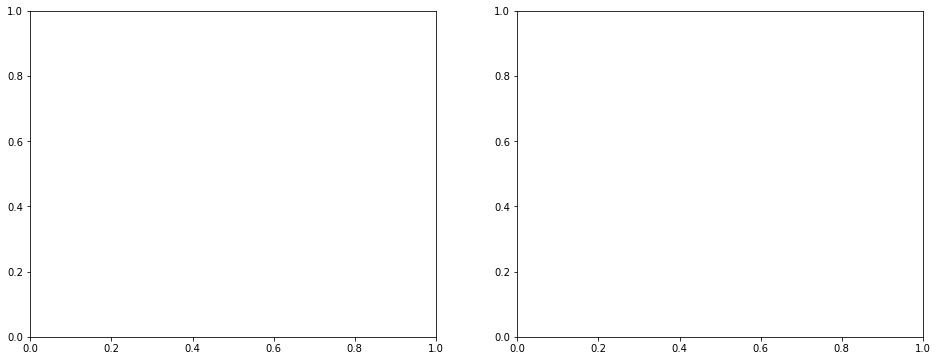

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ano = np.where(y_test==1, 1,0).sum()
sain = np.where(y_test==0, 1,0).sum()
y_tst =  [['OK','KO'][int(v)] for v in y_test]

txt=str(round(100*ano/(KO+KO),1))+'% ('+str(KO)+'/'+str(OK)+')'

fig.suptitle("CLASSIFICATION OK vs KO = "+txt)
plt.xlabel("$pc_1$")
plt.ylabel("$pc_2$")

plot(x=X_test_reduit_torch[:,0], y=X_test_reduit_torch[:,1], hue=y_tst, ec=None, ax=ax1)
plot(x=X_test_reduit_keras[:,0], y=X_test_reduit_keras[:,1], hue=y_tst, ec=None, ax=ax2)
